In [1]:
import json
from glob import glob

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/real_data

!unzip -qq "/content/drive/MyDrive/real_data/C project.v2i.darknet.zip"

/content/real_data


In [3]:
# train data / json file 갯수
train_filepaths = list(glob('/content/drive/MyDrive/darknet/train/*.txt'))

len(train_filepaths)

1741

In [4]:
# test data / json file 갯수
test_filepaths = list(glob('/content/drive/MyDrive/darknet/test/*.txt'))

len(test_filepaths)

134

In [5]:
from glob import glob

for filename in glob('/content/drive/MyDrive/darknet/train/*.txt'):
  print(filename)

/content/drive/MyDrive/darknet/train/003_00009_04_c031.rf.33b170f669f80e61c952009c843643d1.txt
/content/drive/MyDrive/darknet/train/003_00043_04_c031.rf.858d76af6281289a8612e3fb6bfd8eb6.txt
/content/drive/MyDrive/darknet/train/003_00010_10_c031.rf.13d9e7a437e3cac5f86af972268f7326.txt
/content/drive/MyDrive/darknet/train/003_00009_11_c031.rf.7e8a95e644cd7ebbfbce2e985fc04727.txt
/content/drive/MyDrive/darknet/train/033_00081_09_c031.rf.0330860b9b0d4b804d88fac3d1dac54f.txt
/content/drive/MyDrive/darknet/train/003_00009_01_c031.rf.cfc14131cc8490b55cb551e031ad72b6.txt
/content/drive/MyDrive/darknet/train/003_00035_07_c031.rf.1b5a749f788c975e5a04e652dfcd8c97.txt
/content/drive/MyDrive/darknet/train/018_00053_04_c031.rf.ac8bac7f281155e9682ceaca2bfd6c0d.txt
/content/drive/MyDrive/darknet/train/034_00057_07_c031.rf.b6eb2f3d4282ffc9577f9d7a21b2355f.txt
/content/drive/MyDrive/darknet/train/003_00045_05_c031.rf.5f446f93f1931d1f3a540efc9a207b2d.txt
/content/drive/MyDrive/darknet/train/003_00032_12_

In [6]:
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 12898, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 12898 (delta 32), reused 39 (delta 23), pack-reused 12844
Receiving objects: 100% (12898/12898), 13.07 MiB | 17.78 MiB/s, done.
Resolving deltas: 100% (8867/8867), done.


In [7]:
!pip install -U -r yolov5/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 21.2 MB/s 
     |████████████████████████████████| 3.1 MB 48.2 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
     |████████████████████████████████| 5.9 MB 58.8 MB/s 
     |████████████████████████████████| 285 kB 69.1 MB/s 
     |████████████████████████████████| 793 kB 56.4 MB/s 
     |████████████████████████████████| 281 kB 72.6 MB/s 
     |████████████████████████████████| 959 kB 53.7 MB/s 
     |████████████████████████████████| 1.6 MB 60.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
  Attempting uninstall: matplotlib
    Found existing installatio

In [8]:
import torch

#파이토치 버전 확인, cuda device properties 확인
print('torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))
 

torch 1.12.1+cu113 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15109MB, multi_processor_count=40)


In [9]:
# !mkdir datasets
# %cd /content/datasets/

!curl -L "https://app.roboflow.com/ds/6aNqOvw2mo?key=ElOc0IYPQW" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   895  100   895    0     0   1019      0 --:--:-- --:--:-- --:--:--  1018
100 85.7M  100 85.7M    0     0  24.5M      0  0:00:03  0:00:03 --:--:-- 56.7M
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
   creating: test/
 extracting: test/001_00097_05_c031.rf.febecac1d13eda9e78f7d0b9986838d4.jpg  
 extracting: test/001_00097_05_c031.rf.febecac1d13eda9e78f7d0b9986838d4.txt  
 extracting: test/001_00097_12_c031.rf.583054232c21141c36b1d40b5b9747ec.jpg  
 extracting: test/001_00097_12_c031.rf.583054232c21141c36b1d40b5b9747ec.txt  
 extracting: test/001_00100_01_c031.rf.dfc404deb6ae6cfcafc8880ee05e2b6d.jpg  
 extracting: test/001_00100_01_c031.rf.dfc404deb6ae6cfcafc8880ee05e2b6d.txt  
 extracting: test/001_00100_03_c031.rf.34c2bf1a85f2ae1de6d08e55efb0b18c.jpg  
 extracting: test/00

In [10]:
from glob import glob

# 이미지 경로 list로 넣기
train_img_list = glob('/content/drive/MyDrive/darknet/train/*.jpg') + glob('/content/drive/MyDrive/darknet/train/*.jpeg')
valid_img_list = glob('/content/drive/MyDrive/darknet/test/*.jpg') + glob('/content/drive/MyDrive/darknet/test/*.jpeg')


# txt 파일에 write
with open('/content/drive/MyDrive/darknet/train/train.txt', 'w') as f:
	f.write('\n'.join(train_img_list) + '\n')
    
with open('/content/drive/MyDrive/darknet/test/test.txt', 'w') as f:
	f.write('\n'.join(valid_img_list) + '\n')

In [15]:
!python /content/drive/MyDrive/yolov5-master/train.py --batch 16 --epochs 90 --data /content/drive/MyDrive/darknet/dataset.yaml  --weights yolov5s.pt --name yolov5_tooth

train: weights=yolov5s.pt, cfg=, data=/content/drive/MyDrive/darknet/dataset.yaml, hyp=drive/MyDrive/yolov5-master/data/hyps/hyp.scratch-low.yaml, epochs=90, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=drive/MyDrive/yolov5-master/runs/train, name=yolov5_tooth, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: skipping check (not a git repository), for updates see https://github.com/ultralytics/yolov5
YOLOv5 🚀 2022-9-29 Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, 

In [18]:
!python /content/drive/MyDrive/yolov5-master/detect.py --weights /content/drive/MyDrive/yolov5-master/runs/train/yolov5_tooth3/weights/best.pt --img 320 --conf 0.5 --source /content/drive/MyDrive/darknet/test --classes 11 12 13 14 15 16 17 18 21 22 23 24 25 26 27 28 31 32 33 34 35 36 37 38 41 42 43 44 45 46 47 48

detect: weights=['/content/drive/MyDrive/yolov5-master/runs/train/yolov5_tooth3/weights/best.pt'], source=/content/drive/MyDrive/darknet/test, data=drive/MyDrive/yolov5-master/data/coco128.yaml, imgsz=[320, 320], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=[11, 12, 13, 14, 15, 16, 17, 18, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33, 34, 35, 36, 37, 38, 41, 42, 43, 44, 45, 46, 47, 48], agnostic_nms=False, augment=False, visualize=False, update=False, project=drive/MyDrive/yolov5-master/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 2022-9-29 Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7104520 parameters, 0 gradients, 16.0 GFLOPs
image 1/133 /content/drive/MyDrive/darknet/test/001_00097_05_c031.rf.febecac1d13eda9e78f7d0b9986838d4.jpg: 320x3

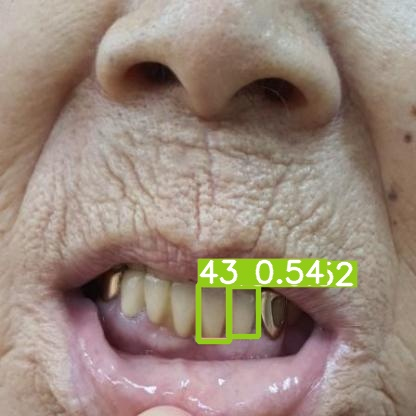

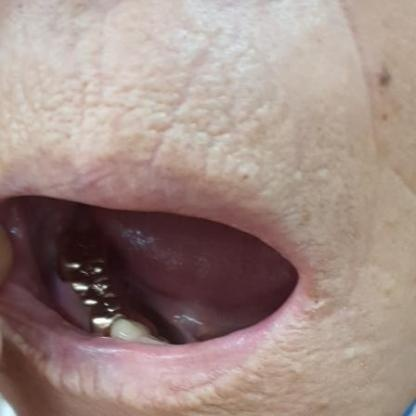

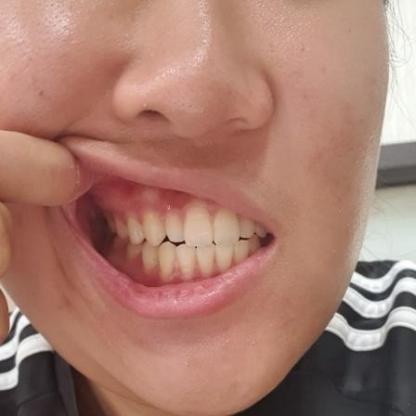

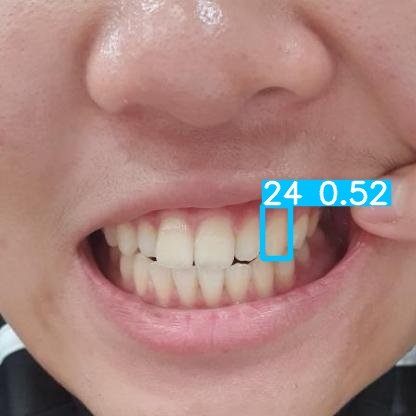

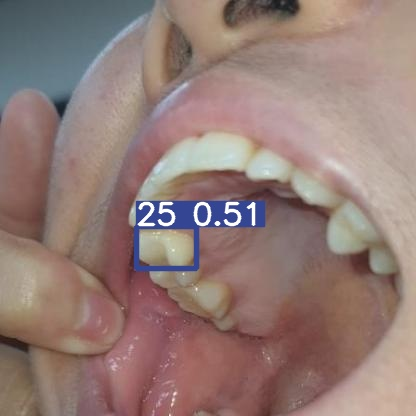

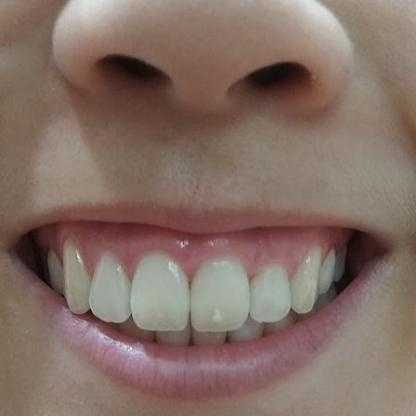

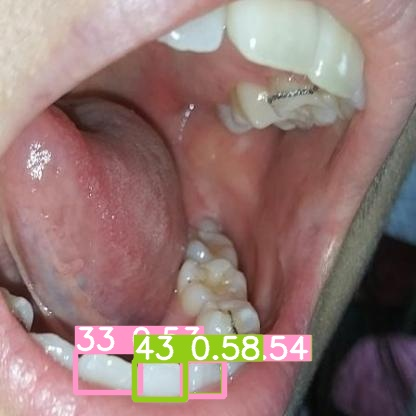

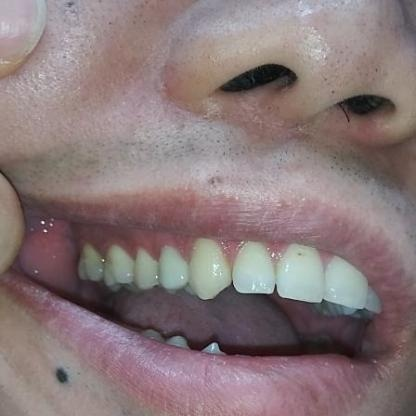

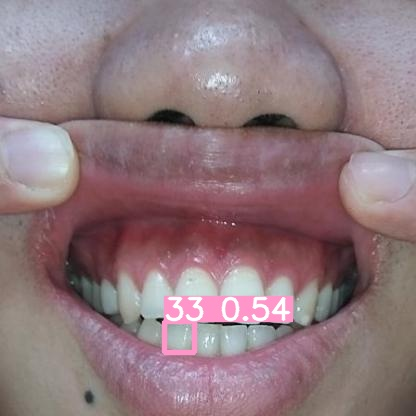

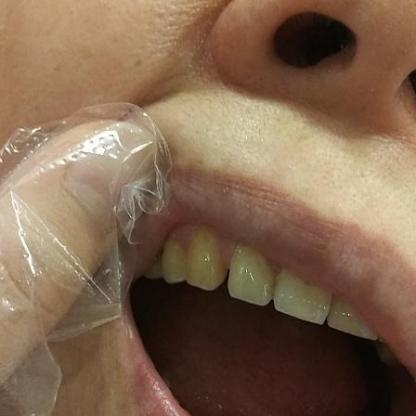

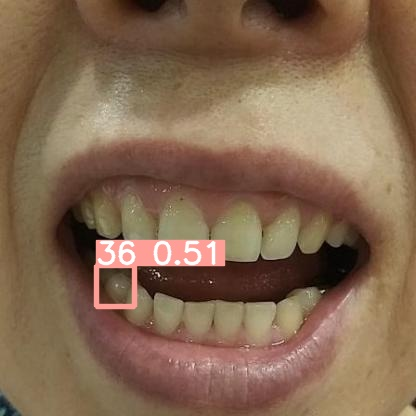

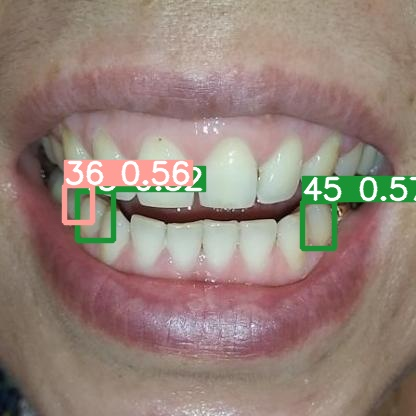

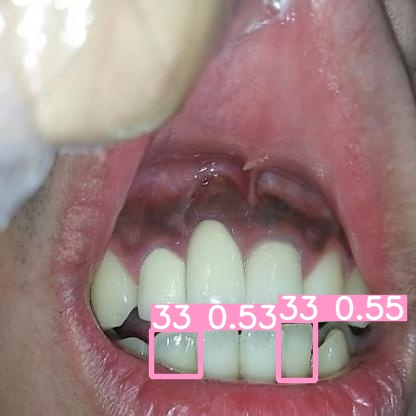

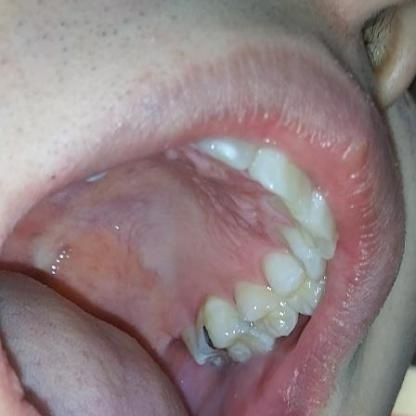

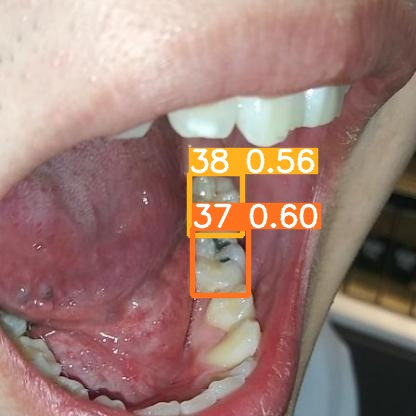

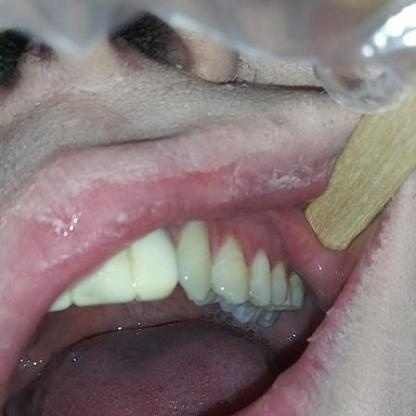

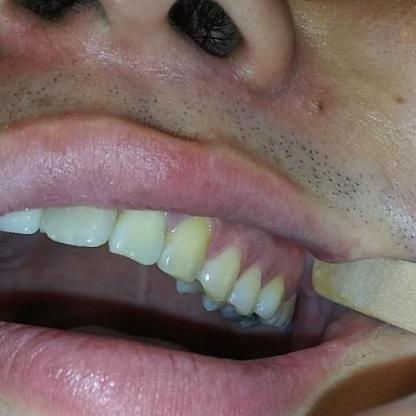

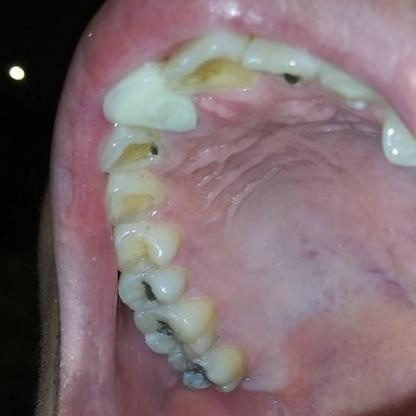

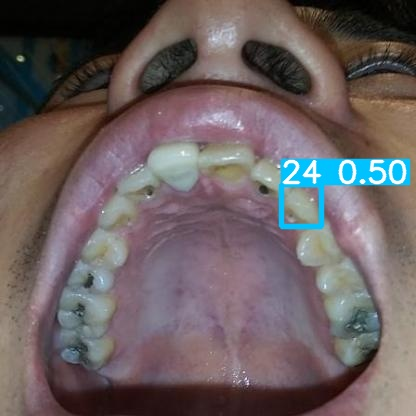

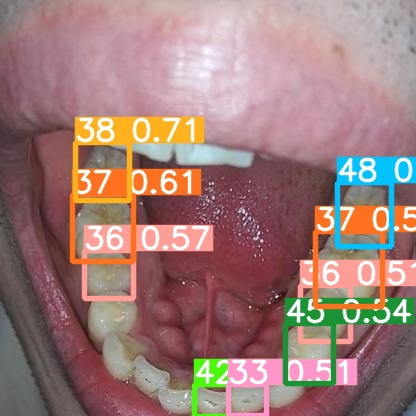

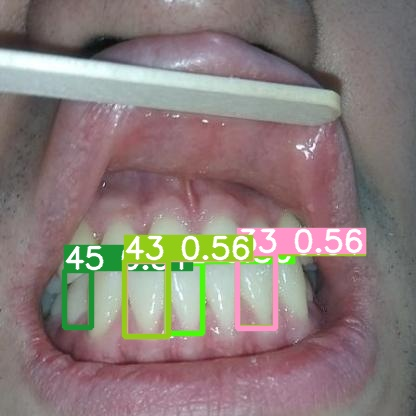

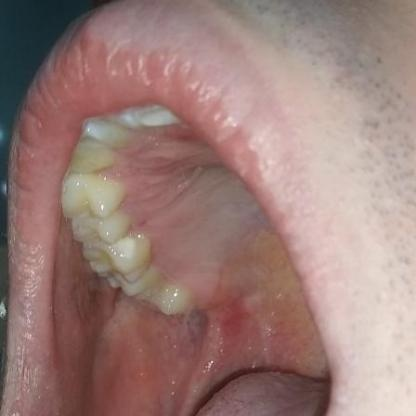

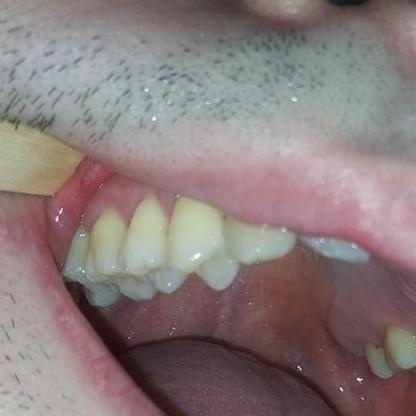

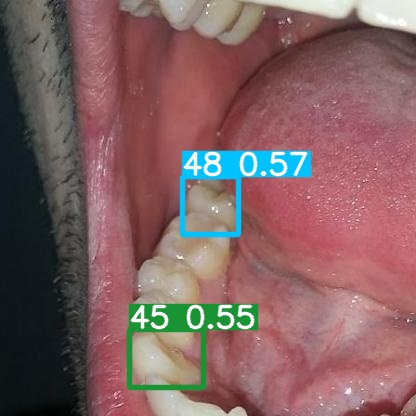

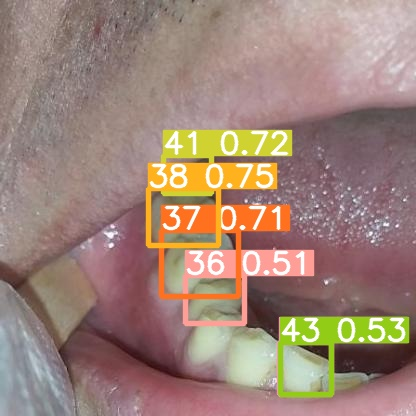

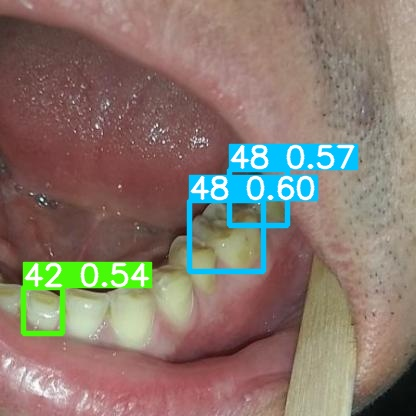

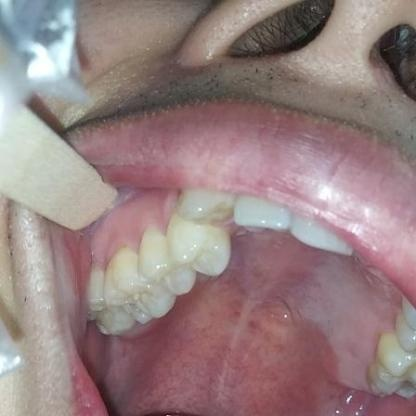

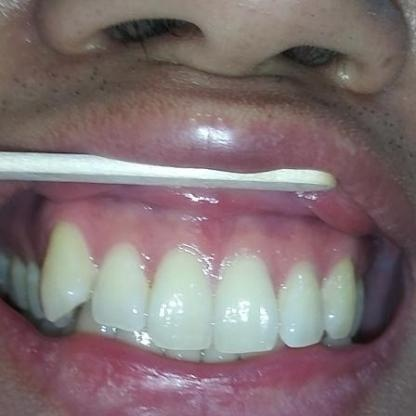

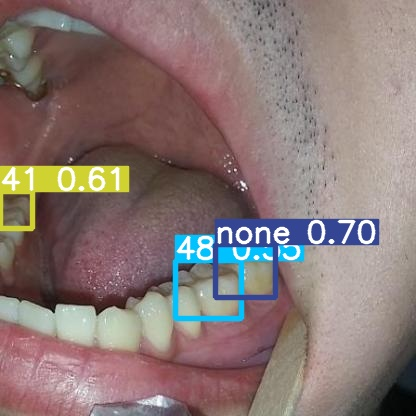

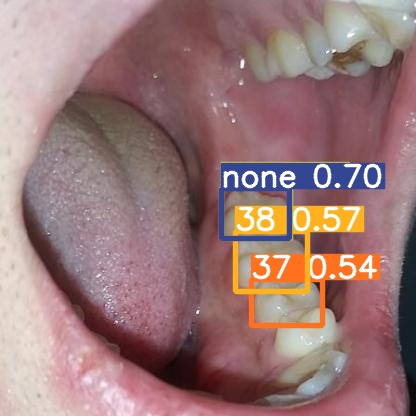

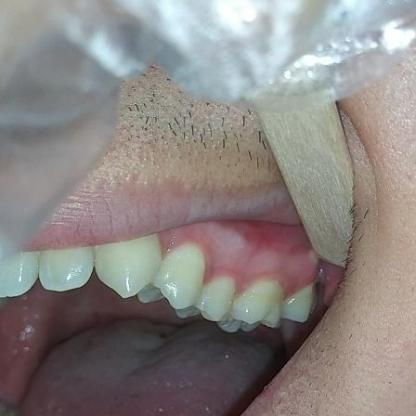

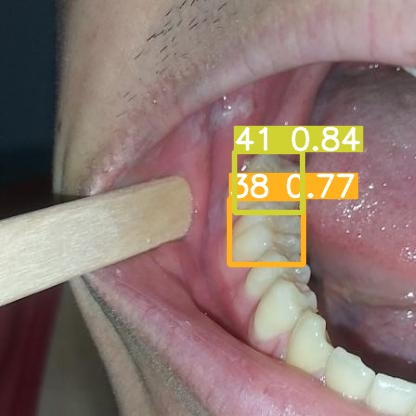

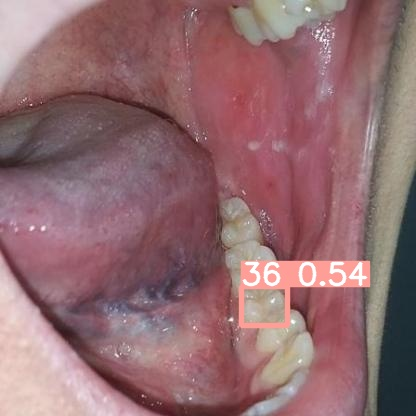

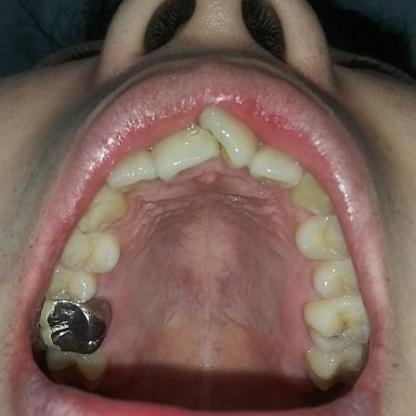

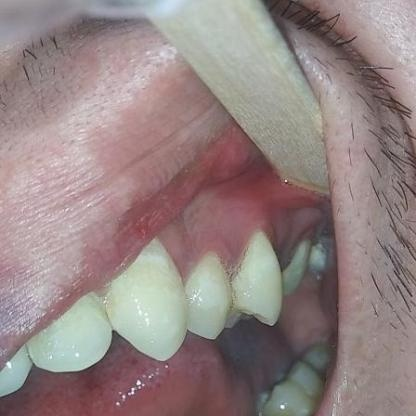

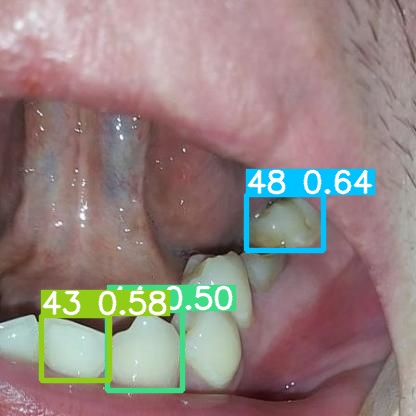

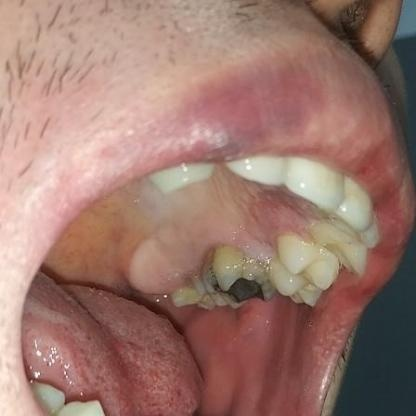

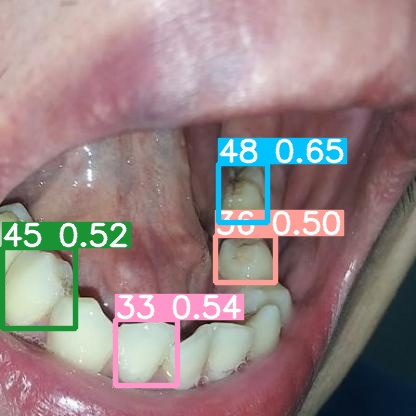

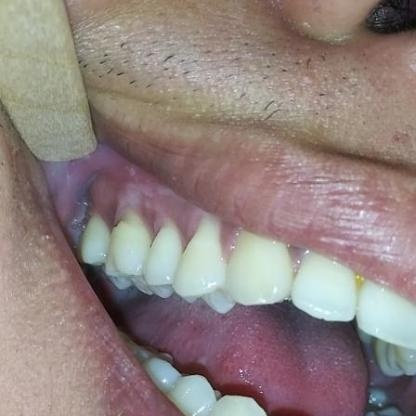

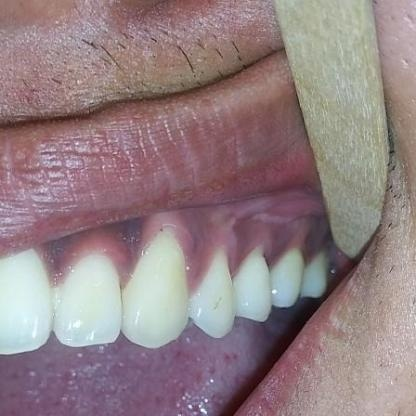

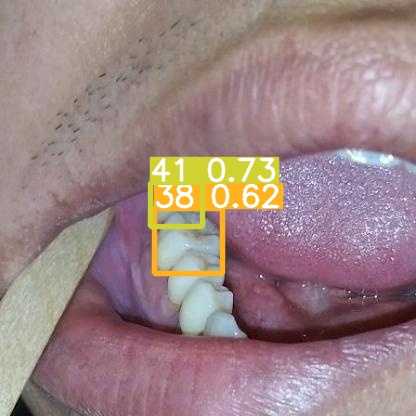

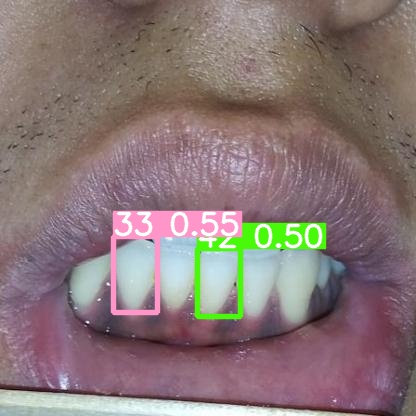

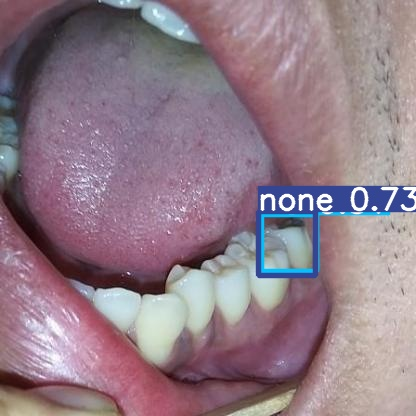

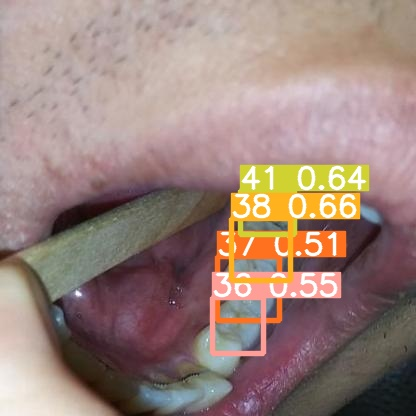

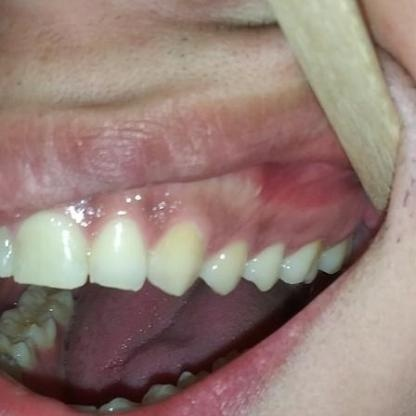

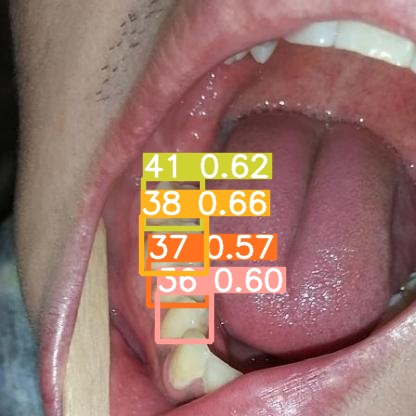

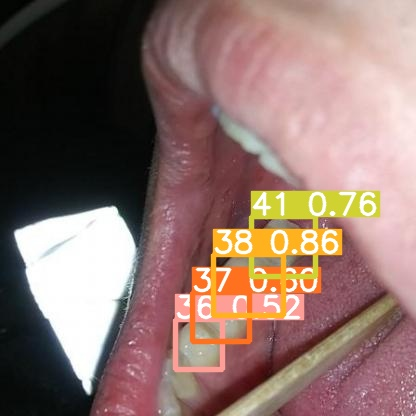

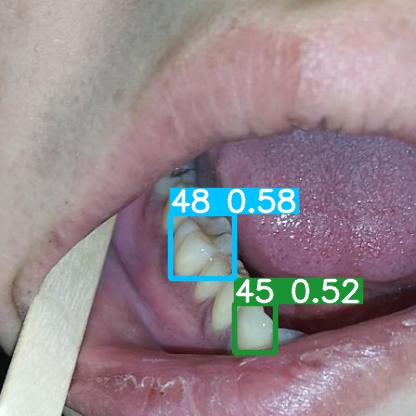

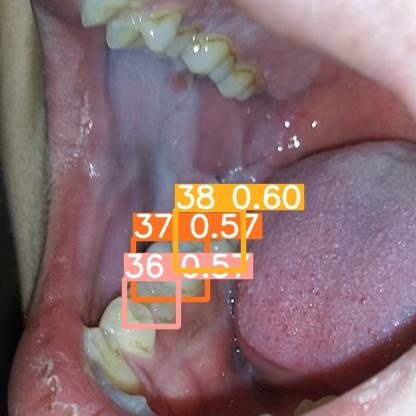

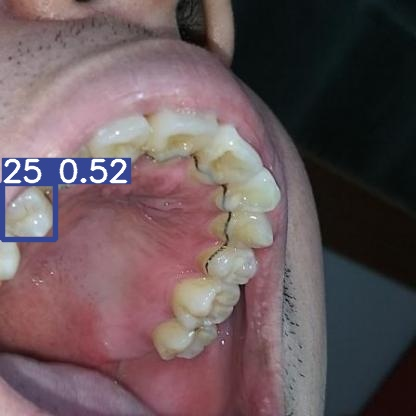

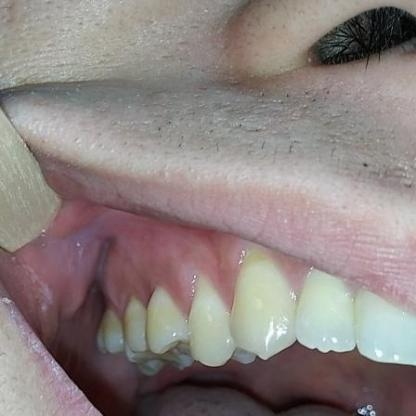

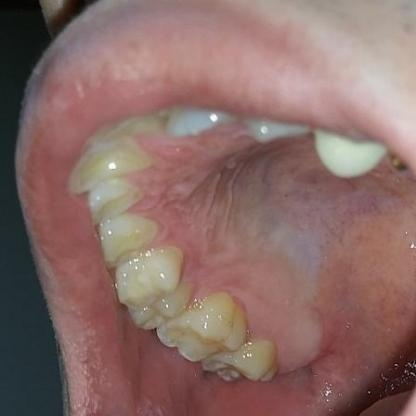

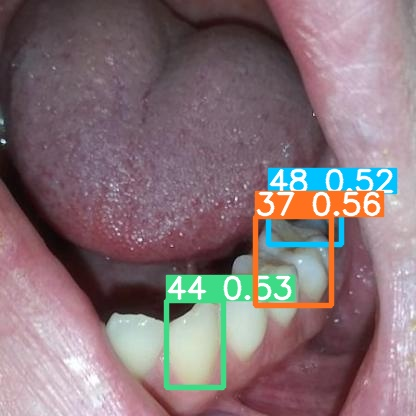

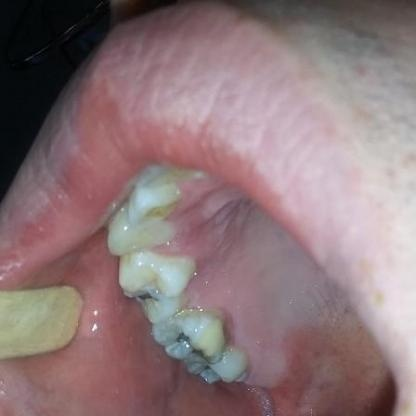

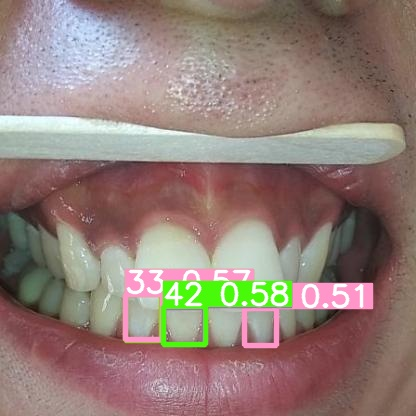

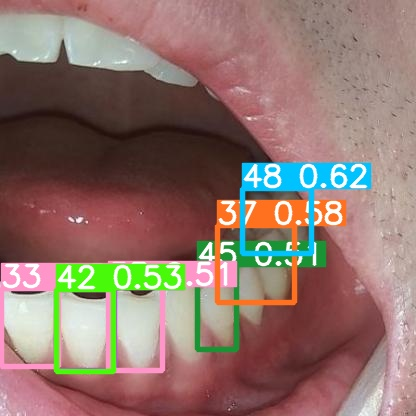

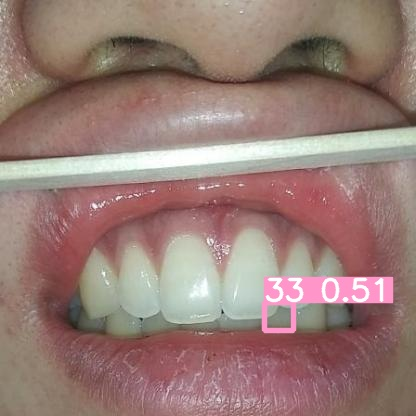

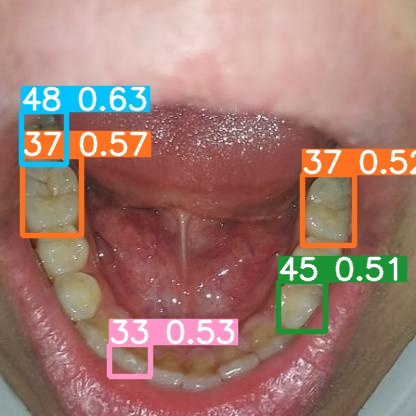

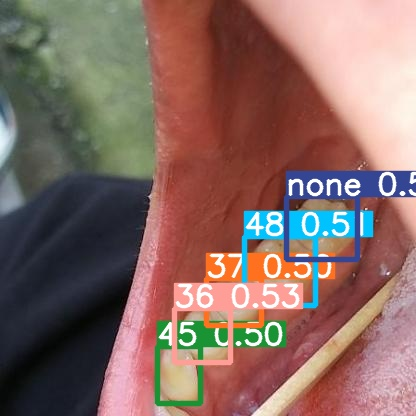

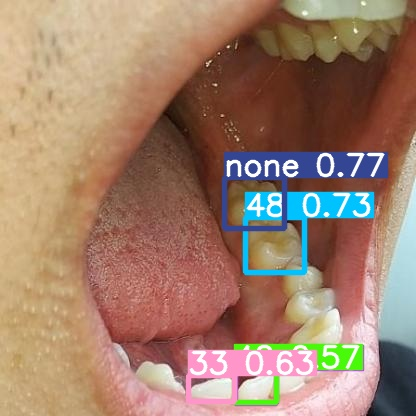

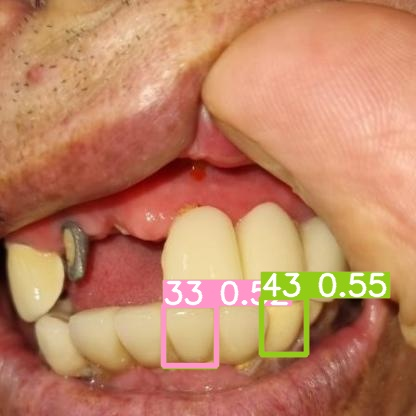

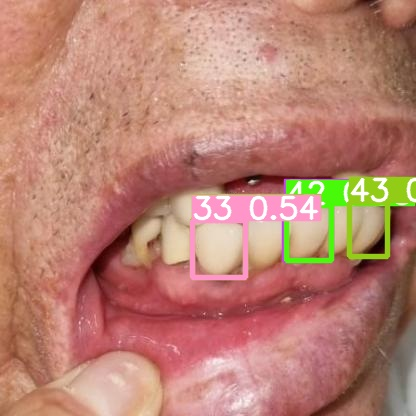

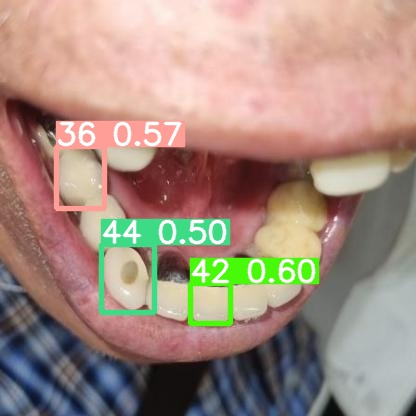

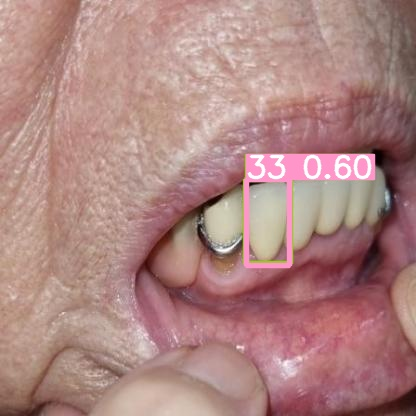

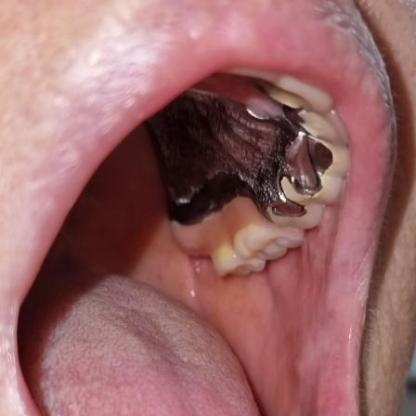

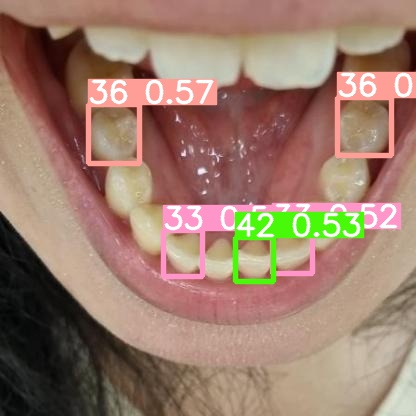

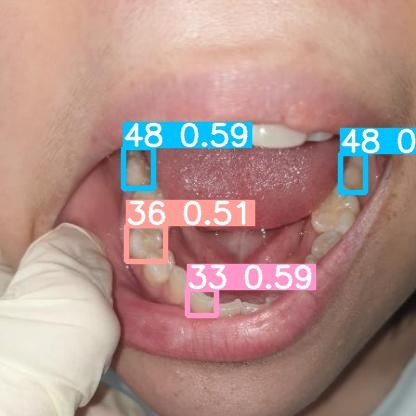

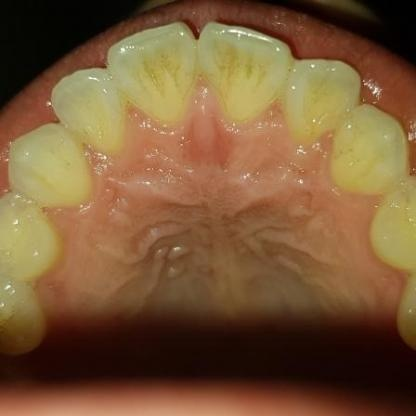

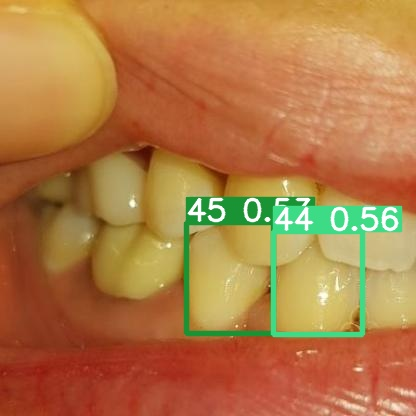

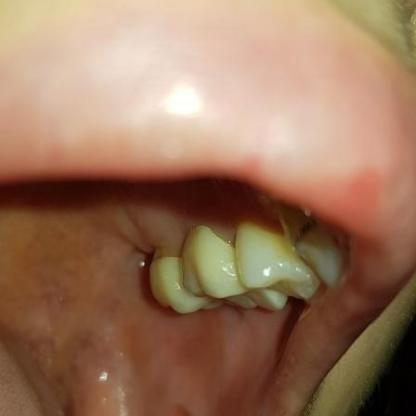

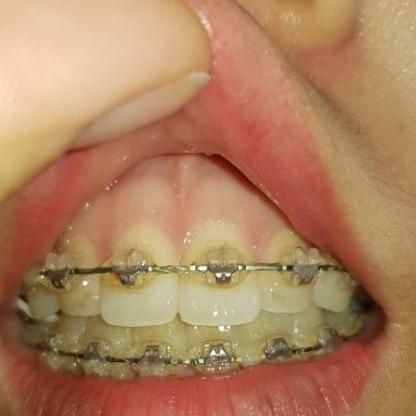

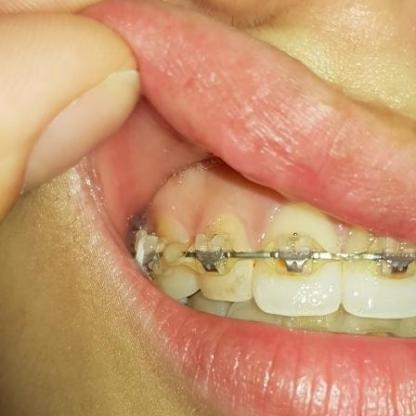

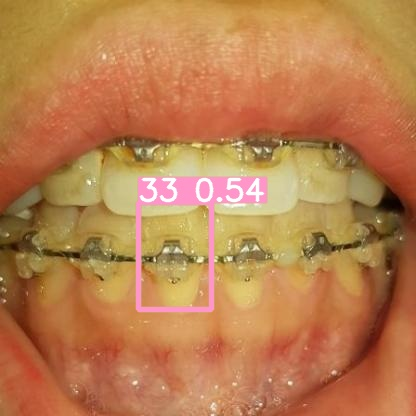

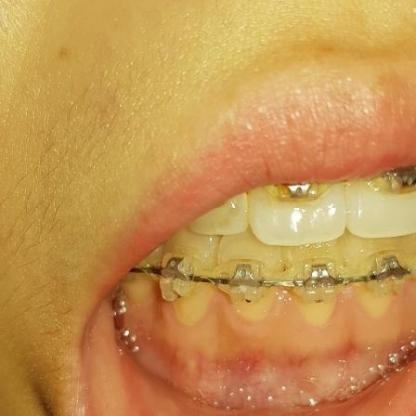

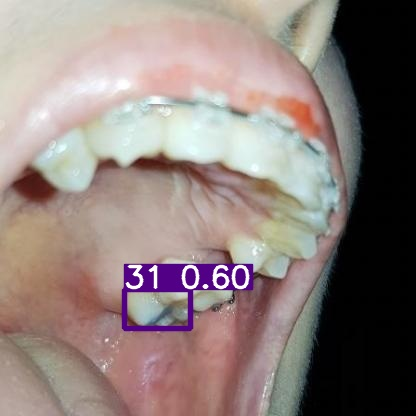

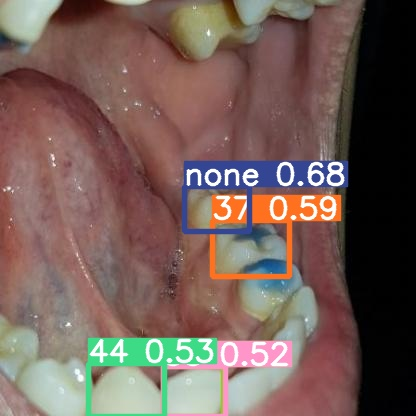

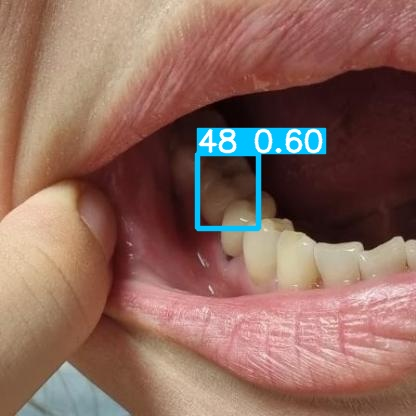

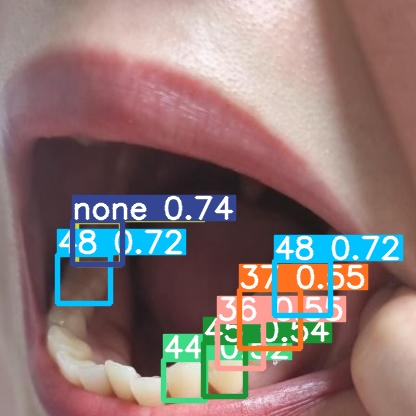

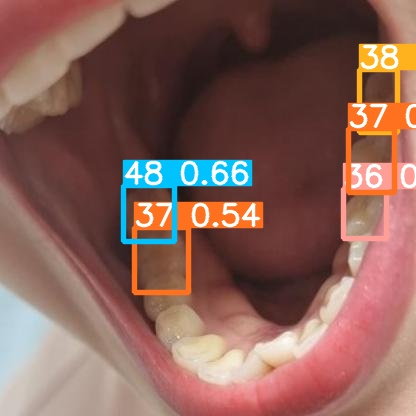

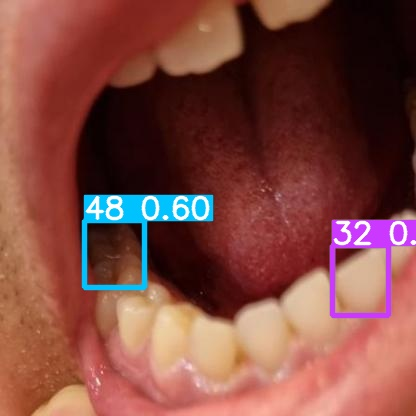

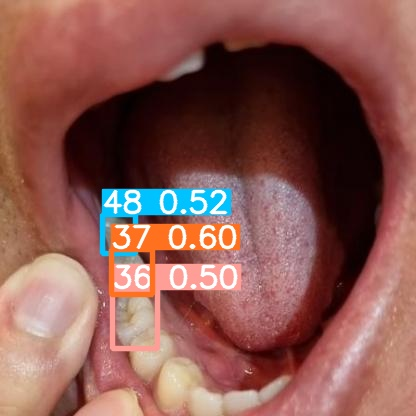

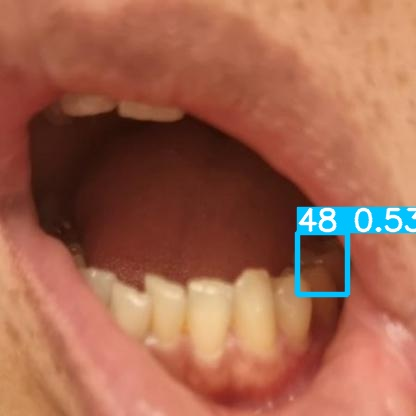

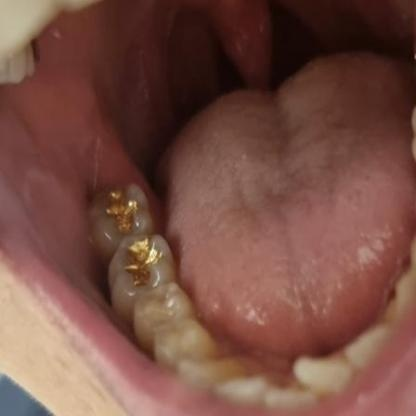

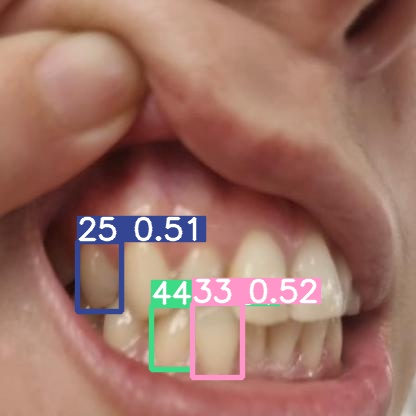

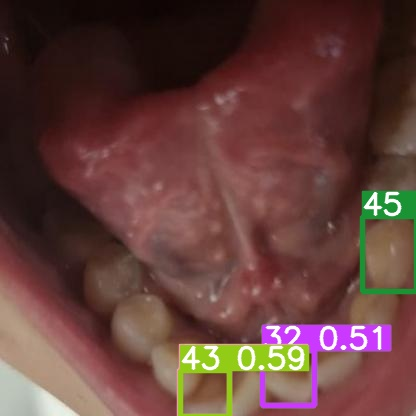

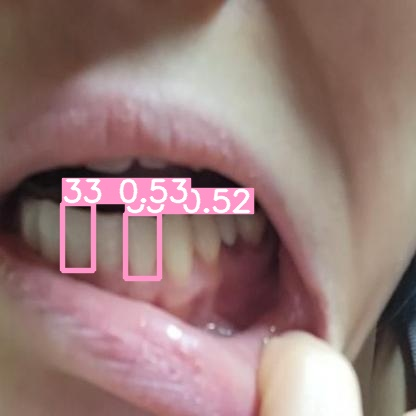

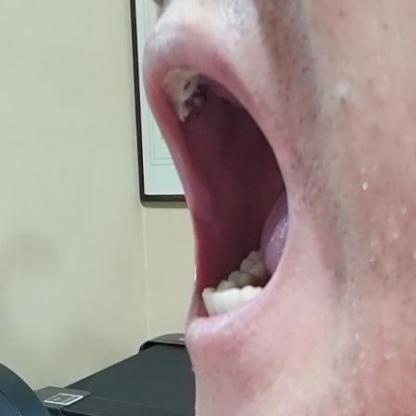

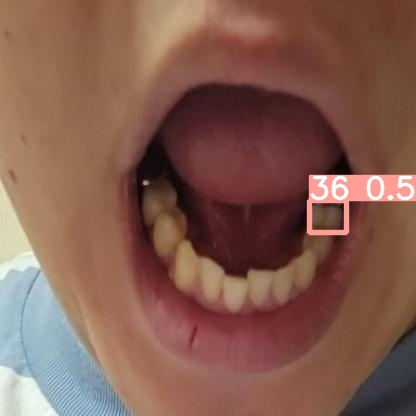

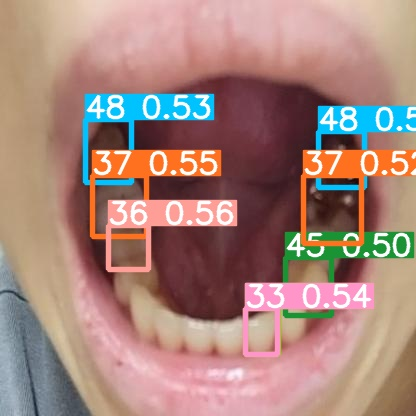

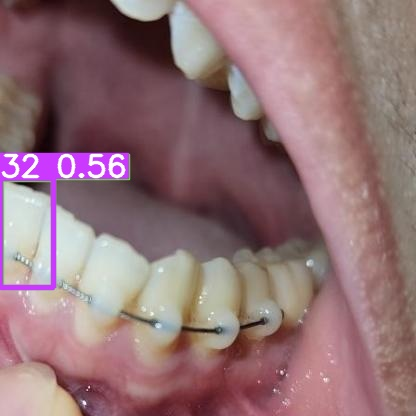

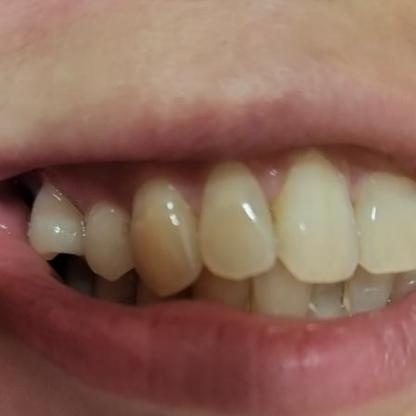

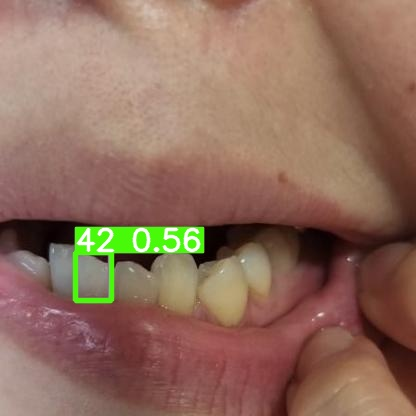

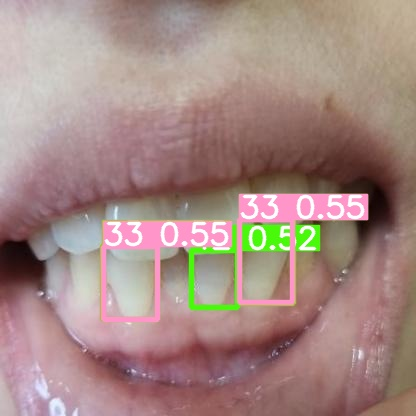

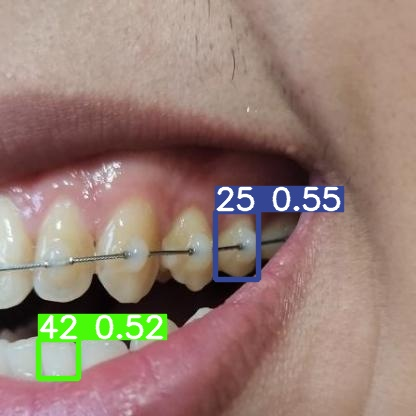

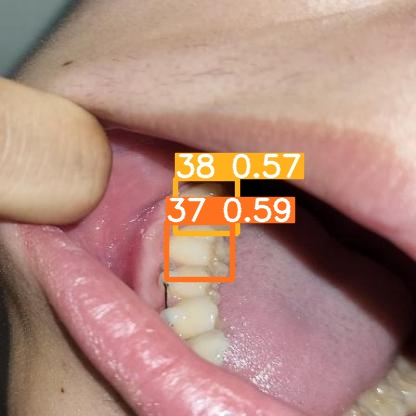

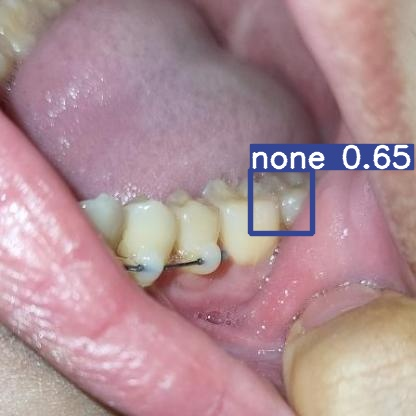

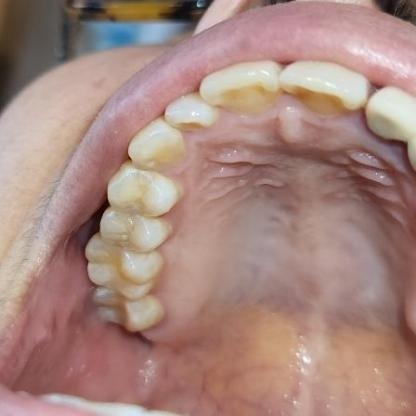

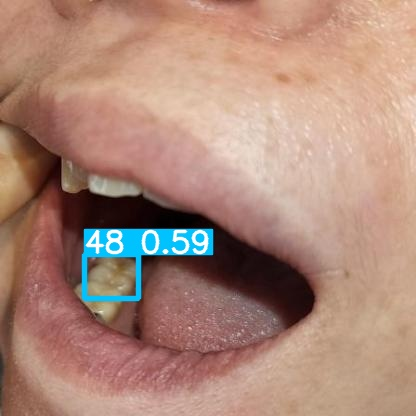

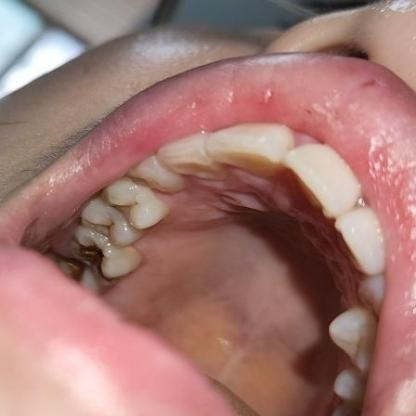

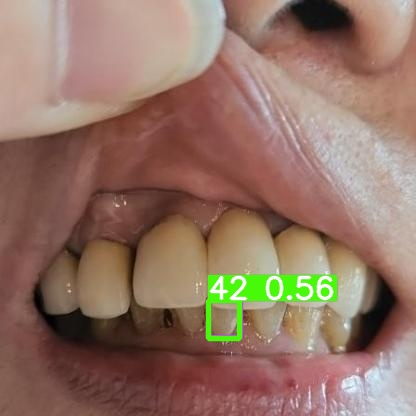

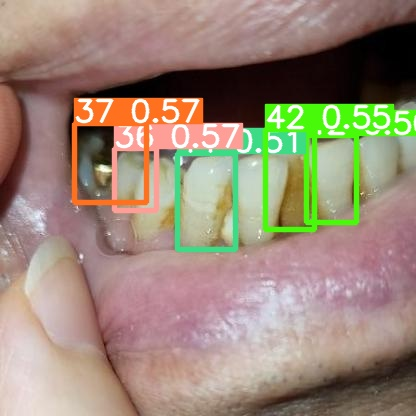

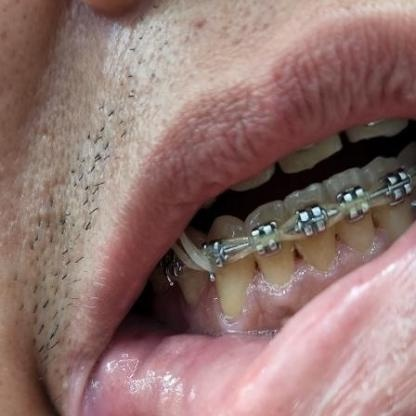

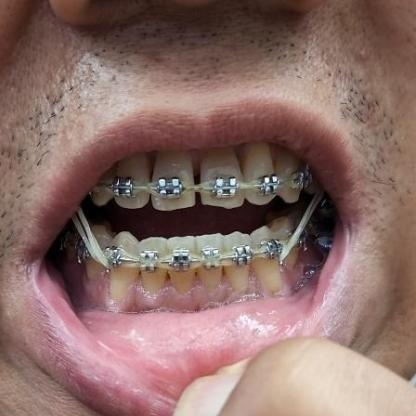

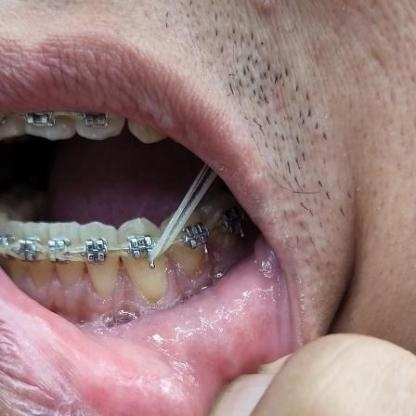

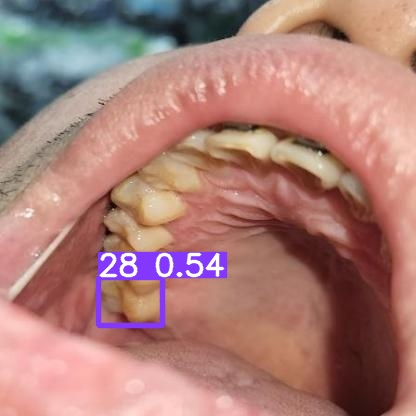

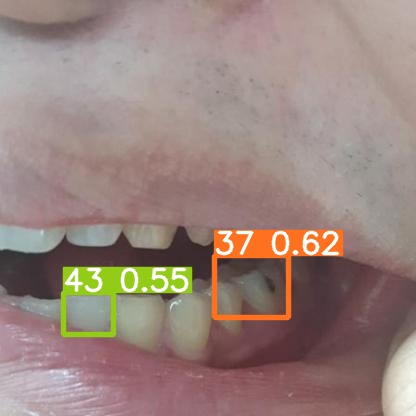

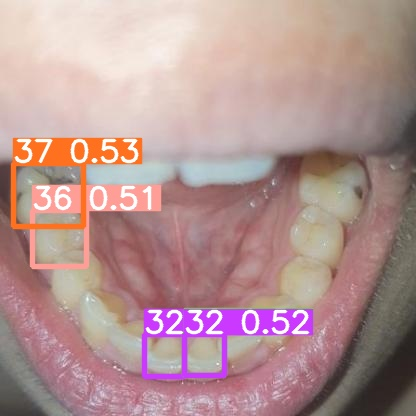

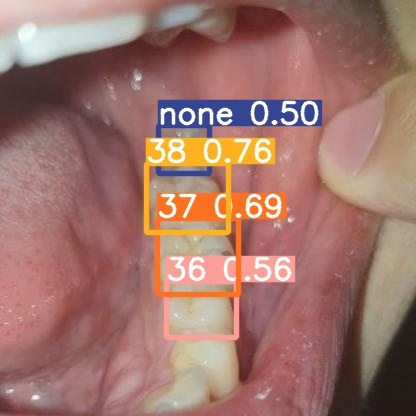

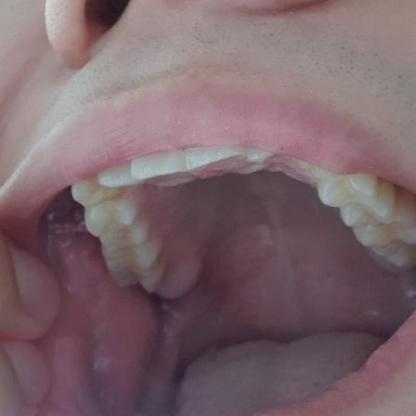

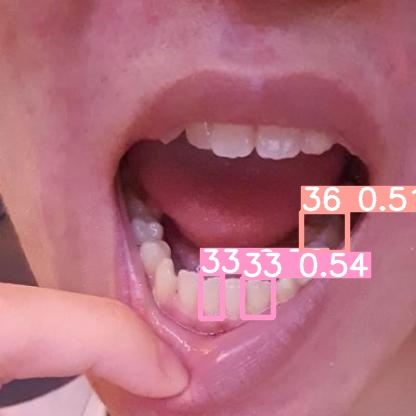

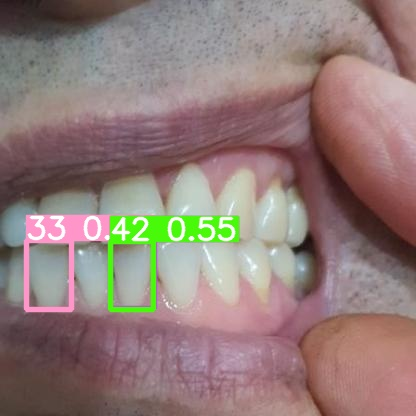

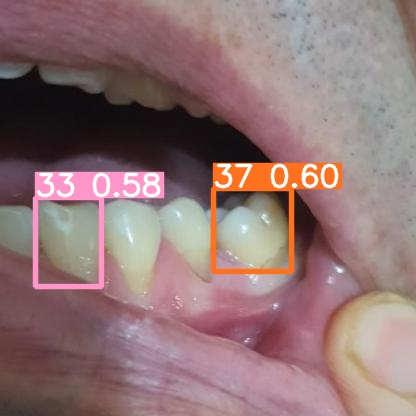

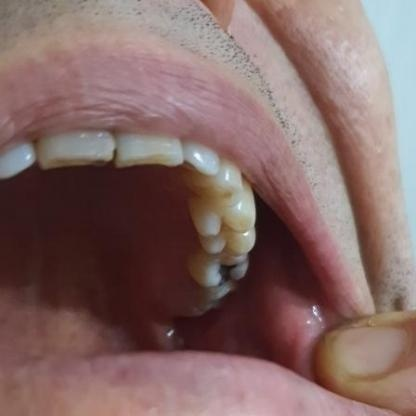

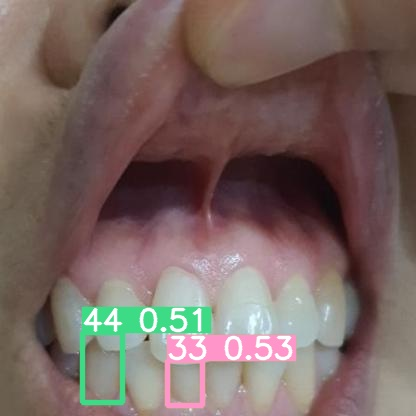

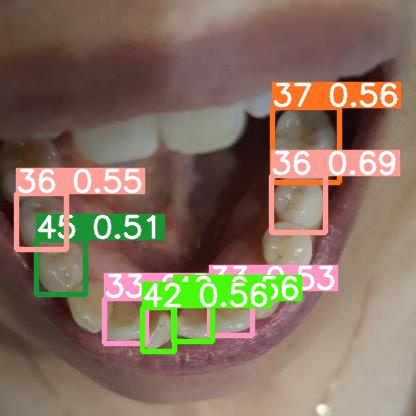

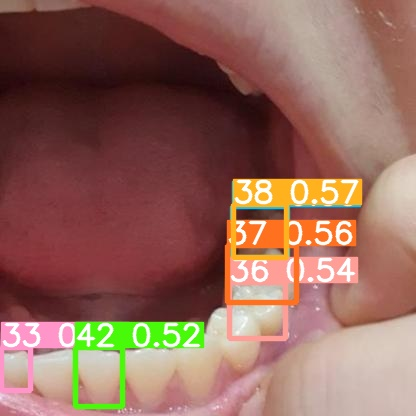

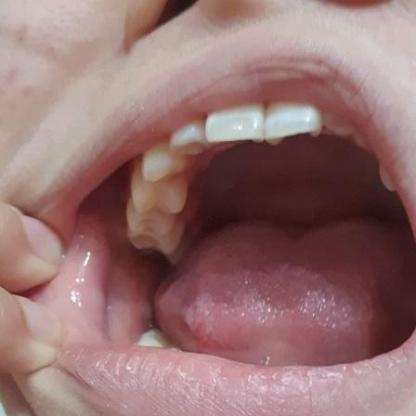

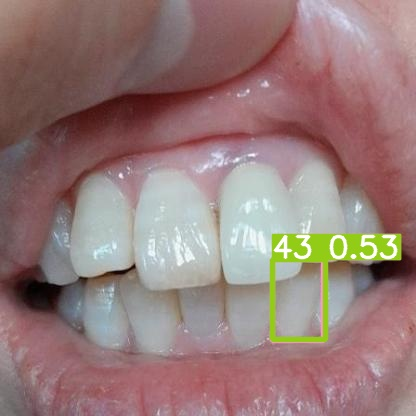

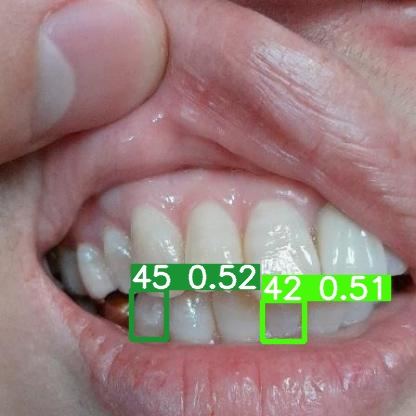

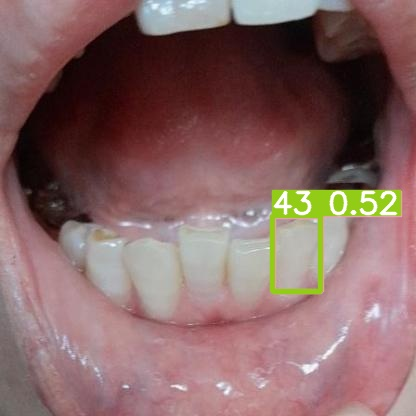

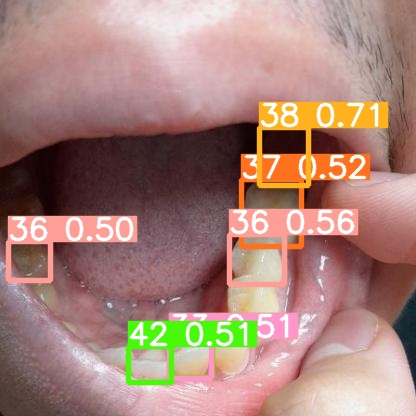

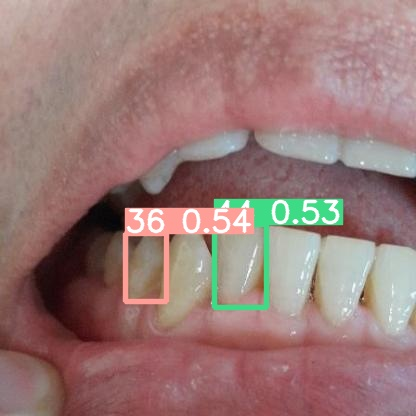

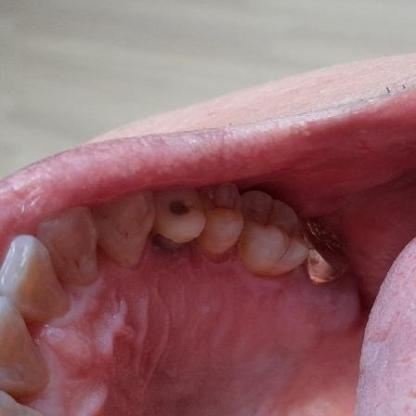

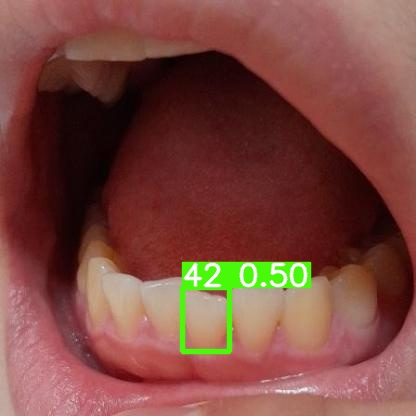

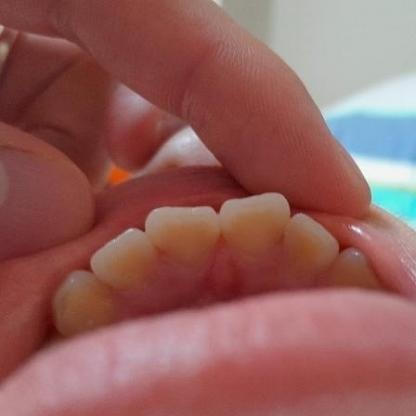

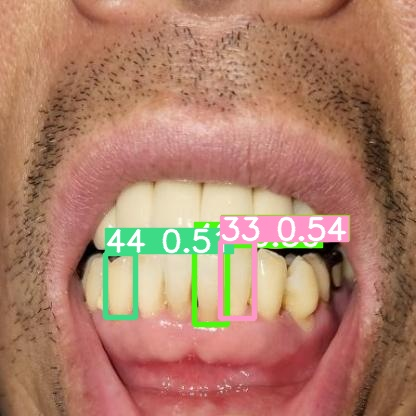

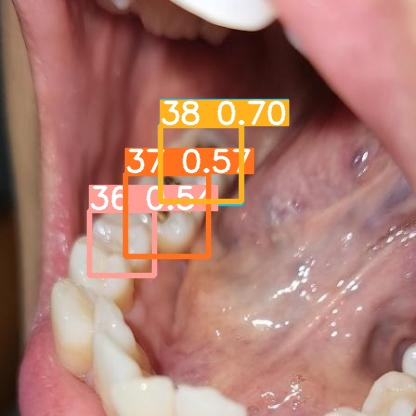

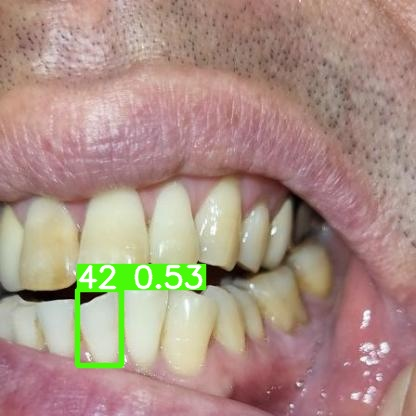

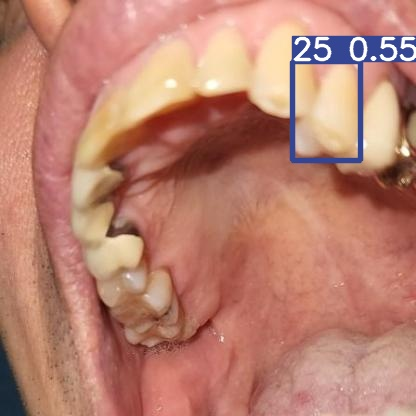

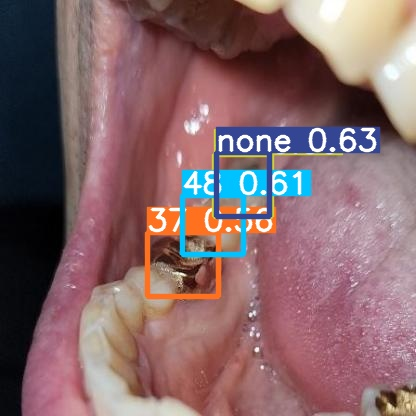

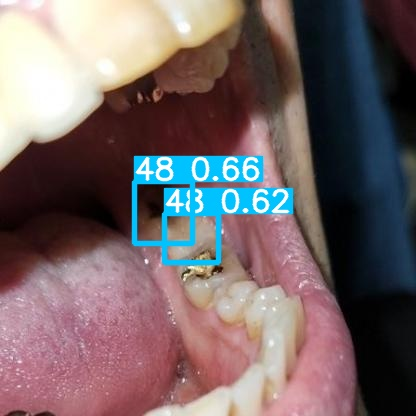

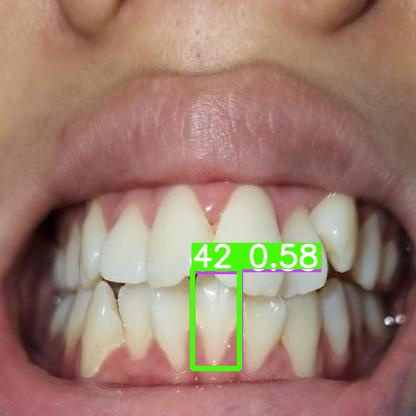

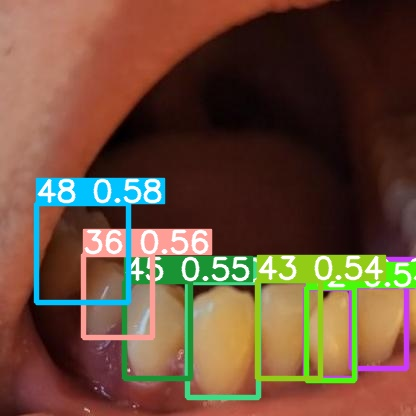

In [19]:
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/drive/MyDrive/yolov5-master/runs/detect/exp2/*.jpg'):
    display(Image(filename=imageName))
    print("\n")

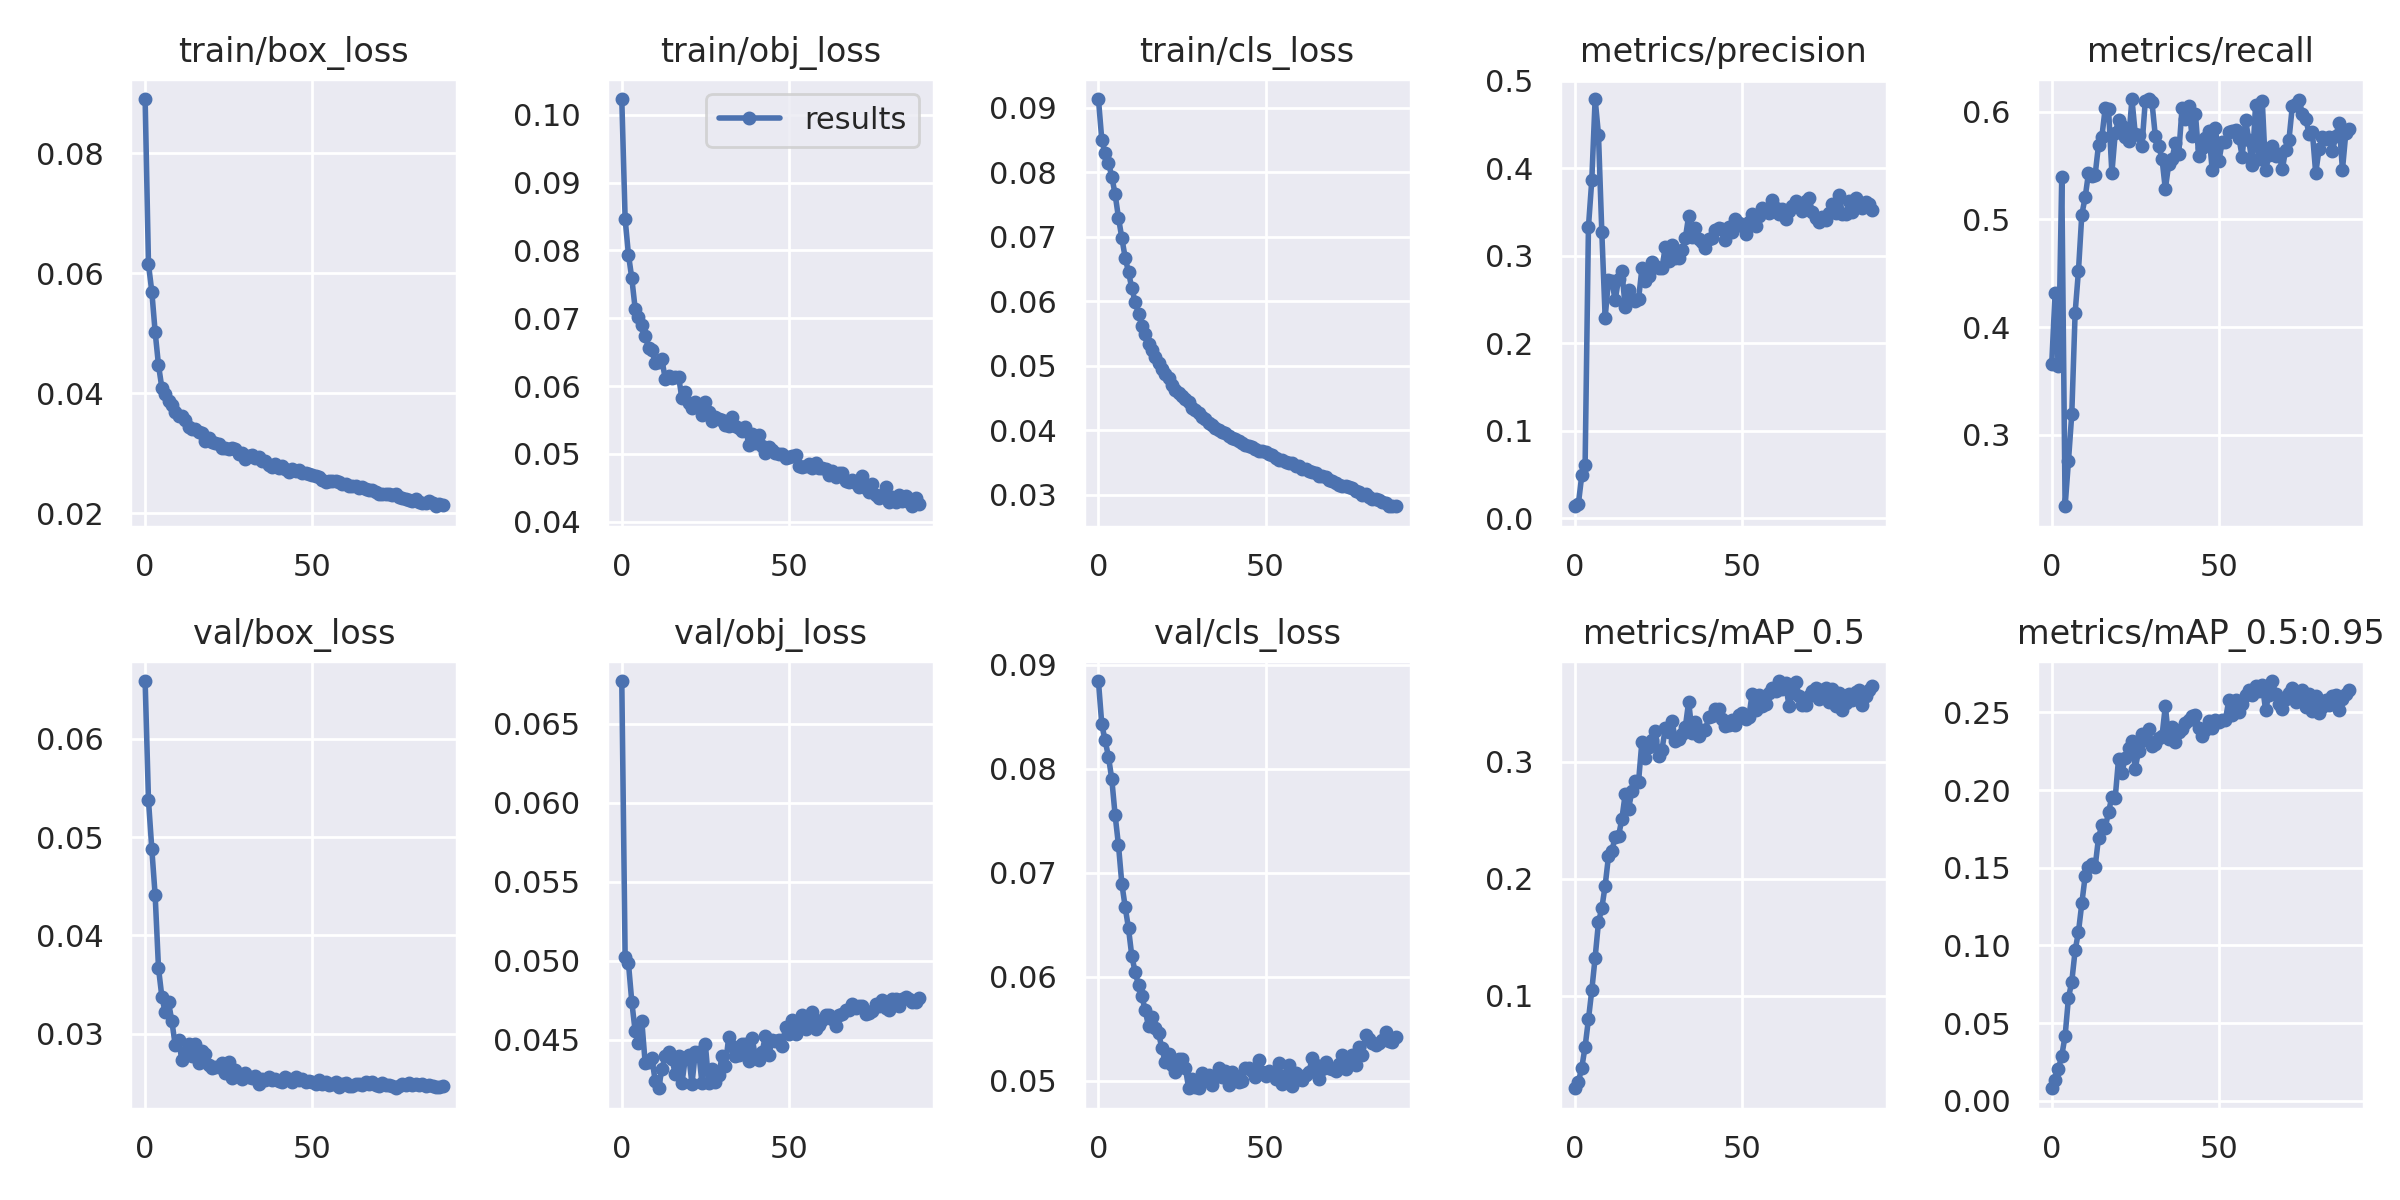